In [1]:
!pip install psycopg2

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
def decimal_formatter(number):
    return format(number, '.3f')

In [4]:
def MacdAnalysis(data : pd.DataFrame, macd, macdOne, macdTwo):
    countOne = len(data[(data[macd] < data[macdOne]) & (data[macdOne] > data[macdTwo])])
    print("Count of Macd < Macd One and Macd One > Macd Two : ", countOne)
    print("Percentage of Macd < Macd One and Macd One > Macd Two : ", decimal_formatter(countOne / len(data)))
    print("----------------------------------------------------------")
    countTwo = len(data[(data[macd] > data[macdOne]) & (data[macdOne] > data[macdTwo])])
    print("Count of Macd > Macd One > Macd Two : ", countTwo)
    print("Percentage of Macd > Macd One > Macd Two : ", decimal_formatter(countTwo / len(data)))
    print("----------------------------------------------------------")
    countThree = len(data[(data[macd] > data[macdOne]) & (data[macdOne] < data[macdTwo])])
    print("Count of Macd > Macd One and Macd One < Macd Two : ", countThree)
    print("Percentage of Macd > Macd One and Macd One < Macd Two : ", decimal_formatter(countThree / len(data)))
    print("----------------------------------------------------------")
    countFour = len(data[(data[macd] < data[macdOne]) & (data[macdOne] < data[macdTwo])])
    print("Count of Macd < Macd One < Macd Two : ", countFour)
    print("Percentage of Macd < Macd One < Macd Two : ", decimal_formatter(countFour / len(data)))

In [5]:
def AnalysisPlot(data, title, side): 
    fig, axis = plt.subplots(3,4 , figsize = (20,20))
    fig.suptitle(title)
    if side == "Exit":
        axis[0,0].hist(data['rsibt'])
        axis[0, 0].set_title("RSI")

        axis[0,1].hist(data['rsi1bt'])
        axis[0, 1].set_title("RSI ONE")

        axis[0,2].hist(data['stochkbt'])
        axis[0, 2].set_title("STOCHK")

        axis[0,3].hist(data['stochk1bt'])
        axis[0, 3].set_title("STOCHK ONE")

        axis[1,0].hist(data['stochdbt'])
        axis[1, 0].set_title("STOCHD")

        axis[1,1].hist(data['stochd1bt'])
        axis[1, 1].set_title("STOCHD ONE")

        axis[1,2].hist(data['sarbt'])
        axis[1, 2].set_title("SAR")

        axis[1,3].hist(data['sar1bt'])
        axis[1, 3].set_title("SAR ONE")

        axis[2,0].hist(data['macdhistbt'])
        axis[2, 0].set_title("MACDHIST")

        axis[2,1].hist(data['macdhist1bt'])
        axis[2, 1].set_title("MACDHIST ONE")

        axis[2,2].hist(data['macdhist2bt'])
        axis[2, 2].set_title("MACDHIST TWO")
        return 
    axis[0,0].hist(data['rsi'])
    axis[0, 0].set_title("RSI")

    axis[0,1].hist(data['rsi1'])
    axis[0, 1].set_title("RSI ONE")

    axis[0,2].hist(data['stochk'])
    axis[0, 2].set_title("STOCHK")

    axis[0,3].hist(data['stochk1'])
    axis[0, 3].set_title("STOCHK ONE")

    axis[1,0].hist(data['stochd'])
    axis[1, 0].set_title("STOCHD")

    axis[1,1].hist(data['stochd1'])
    axis[1, 1].set_title("STOCHD ONE")

    axis[1,2].hist(data['sar'])
    axis[1, 2].set_title("SAR")

    axis[1,3].hist(data['sar1'])
    axis[1, 3].set_title("SAR ONE")

    axis[2,0].hist(data['macdhist'])
    axis[2, 0].set_title("MACDHIST")

    axis[2,1].hist(data['macdhist1'])
    axis[2, 1].set_title("MACDHIST ONE")

    axis[2,2].hist(data['macdhist2'])
    axis[2, 2].set_title("MACDHIST TWO")
    

In [6]:
import psycopg2
pd.set_option('display.max_columns', 100)

class Database:
    __instance = None

    def __init__(self):
        if Database.__instance is not None:
            raise Exception('This Class Singleton')
        else:
            self.conn = psycopg2.connect(
                database="BinanceAlgoTrading", user='postgres', password='mertcan', host='127.0.0.1', port='5433'
            )
            self.cursor = self.conn.cursor()
            Database.__instance = self

    @staticmethod
    def getInstance():
        if Database.__instance is None:
            Database()
        return Database.__instance

    def CreateSQLQueryToDataFrame(self, queryString: str) -> pd.DataFrame:
        self.cursor = self.conn.cursor()
        self.cursor.execute(queryString)
        column_names = [i[0] for i in self.cursor.description]
        return pd.DataFrame(self.cursor.fetchall(), columns=column_names)

In [7]:
dbase = Database.getInstance()

In [8]:
df = dbase.CreateSQLQueryToDataFrame("select bt.*,bt1.closethis as closethisbt ,\
                    bt1.close1 as close1bt, bt1.rsi as rsibt, bt1.rsi1 as rsi1bt, bt1.macd as macdbt,	bt1.macd1 as macd1bt\
                    ,bt1.macd2 as macd2bt	,bt1.macdsignal as macdsignalbt	,bt1.macdsignal1 as macdsignal1bt	,bt1.macdsignal2 as macdsignal2bt	\
                    ,bt1.macdhist as macdhistbt	,bt1.macdhist1 as macdhist1bt	,bt1.macdhist2 as macdhist2bt	,bt1.stochk as stochkbt	,bt1.stochk1 as stochk1bt	,bt1.stochd as stochdbt\
                    ,bt1.stochd1 as stochd1bt	,bt1.sar as sarbt	,bt1.sar1 as sar1bt	,bt1.startmoney as startmoneybt, bt1.reason as reasonbt from fiveminutebacktest as bt\
                    join fiveminutebacktest as bt1 on bt.backtest_id + 1 = bt1.backtest_id where bt.backtest_id % 2 = 1 ")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   backtest_id    479 non-null    int64  
 1   side           479 non-null    object 
 2   closethis      479 non-null    float64
 3   close1         479 non-null    float64
 4   rsi            479 non-null    float64
 5   rsi1           479 non-null    float64
 6   macd           479 non-null    float64
 7   macd1          479 non-null    float64
 8   macd2          479 non-null    float64
 9   macdsignal     479 non-null    float64
 10  macdsignal1    479 non-null    float64
 11  macdsignal2    479 non-null    float64
 12  macdhist       479 non-null    float64
 13  macdhist1      479 non-null    float64
 14  macdhist2      479 non-null    float64
 15  stochk         479 non-null    float64
 16  stochk1        479 non-null    float64
 17  stochd         479 non-null    float64
 18  stochd1   

In [10]:
df.columns

Index(['backtest_id', 'side', 'closethis', 'close1', 'rsi', 'rsi1', 'macd',
       'macd1', 'macd2', 'macdsignal', 'macdsignal1', 'macdsignal2',
       'macdhist', 'macdhist1', 'macdhist2', 'stochk', 'stochk1', 'stochd',
       'stochd1', 'sar', 'sar1', 'startmoney', 'starttime', 'reason',
       'closethisbt', 'close1bt', 'rsibt', 'rsi1bt', 'macdbt', 'macd1bt',
       'macd2bt', 'macdsignalbt', 'macdsignal1bt', 'macdsignal2bt',
       'macdhistbt', 'macdhist1bt', 'macdhist2bt', 'stochkbt', 'stochk1bt',
       'stochdbt', 'stochd1bt', 'sarbt', 'sar1bt', 'startmoneybt', 'reasonbt'],
      dtype='object')

In [11]:
df.head()

,backtest_id,side,closethis,close1,rsi,rsi1,macd,macd1,macd2,macdsignal,macdsignal1,macdsignal2,macdhist,macdhist1,macdhist2,stochk,stochk1,stochd,stochd1,sar,sar1,startmoney,starttime,reason,closethisbt,close1bt,rsibt,rsi1bt,macdbt,macd1bt,macd2bt,macdsignalbt,macdsignal1bt,macdsignal2bt,macdhistbt,macdhist1bt,macdhist2bt,stochkbt,stochk1bt,stochdbt,stochd1bt,sarbt,sar1bt,startmoneybt,reasonbt
0,41471,Enter,36112.43,36086.07,36.63,35.02,-122.62,-118.46,-108.74,-80.70,-70.23,-58.17,-41.91,-48.23,-50.57,17.77,11.08,13.50,14.11,36405.95,36459.67,100.000000,2022-01-25 01:05:00,Enter,36239.260000,36317.27,52.14,59.46,0.95,-1.66,-12.90,-29.46,-37.06,-45.92,30.41,35.41,33.01,77.69,89.21,81.32,75.81,36143.47,36117.29,100.350000,RSI>50ANDCO
1,41473,Enter,35927.79,35899.94,37.49,35.16,-98.28,-98.32,-94.11,-72.40,-65.93,-57.83,-25.89,-32.40,-36.29,24.43,14.61,19.33,26.56,36028.13,36066.14,100.350000,2022-01-25 05:35:00,Enter,35985.240000,36061.80,51.75,57.19,-20.29,-26.91,-42.76,-47.80,-54.67,-61.62,27.51,27.77,18.86,84.50,91.90,88.16,85.77,35758.67,35739.30,100.500525,RSI>50ANDCO
2,41475,Enter,36546.35,36509.46,36.53,34.29,-137.68,-135.91,-127.92,-116.35,-111.02,-104.80,-21.33,-24.89,-23.12,19.76,11.40,14.14,13.36,36909.78,36955.31,100.500525,2022-01-25 21:35:00,Enter,36782.330000,36801.99,55.66,57.14,-4.36,-13.59,-27.16,-44.68,-54.76,-65.05,40.31,41.17,37.89,88.58,88.17,85.23,76.53,36493.65,36473.48,101.143728,RSI>50MACD
3,41477,Enter,36892.70,36804.17,36.52,34.62,-269.15,-241.79,-194.34,-150.69,-121.08,-90.90,-118.45,-120.71,-103.44,12.47,5.41,8.68,7.88,38363.30,38468.55,101.143728,2022-01-26 20:20:00,Enter,37269.005540,36892.70,42.55,36.52,-263.90,-269.15,-241.79,-173.33,-150.69,-121.08,-90.56,-118.45,-120.71,33.27,12.47,17.05,8.68,38227.69,38363.30,102.175394,TP
4,41479,Enter,36416.01,36323.08,34.86,31.26,-290.97,-294.86,-286.06,-267.35,-261.44,-253.09,-23.62,-33.41,-32.97,12.93,3.08,6.84,4.11,36693.72,36786.51,102.175394,2022-01-26 22:00:00,Enter,36787.453302,36594.82,52.26,47.95,-97.16,-121.07,-139.75,-162.84,-179.26,-193.81,65.68,58.19,54.06,81.45,82.90,80.32,79.13,36249.45,36242.12,103.217583,TP


In [12]:
df.groupby('reasonbt').size()

reasonbt
RSI>50ANDCO      239
RSI>50MACD        21
SL                99
STOCH>80ANDCO     70
TP                50
dtype: int64

In [13]:
a = df.groupby('reasonbt').size()

<AxesSubplot:xlabel='reasonbt'>

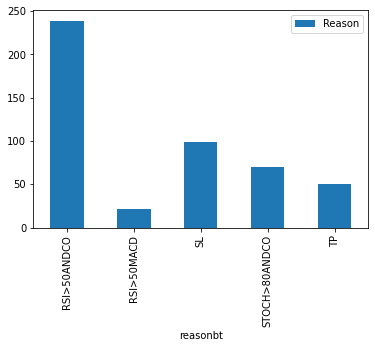

In [14]:
newDf = pd.DataFrame(a, columns = ['Reason'])
newDf.plot(kind='bar')

In [15]:
df.describe()

,backtest_id,closethis,close1,rsi,rsi1,macd,macd1,macd2,macdsignal,macdsignal1,macdsignal2,macdhist,macdhist1,macdhist2,stochk,stochk1,stochd,stochd1,sar,sar1,startmoney,closethisbt,close1bt,rsibt,rsi1bt,macdbt,macd1bt,macd2bt,macdsignalbt,macdsignal1bt,macdsignal2bt,macdhistbt,macdhist1bt,macdhist2bt,stochkbt,stochk1bt,stochdbt,stochd1bt,sarbt,sar1bt,startmoneybt
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.00000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,41949.000000,23039.444259,23003.777328,35.328017,31.570292,-76.052171,-72.651127,-63.622255,-52.615386,-46.756367,-40.28238,-23.436534,-25.894885,-23.339916,25.024071,18.440752,21.002777,20.829854,23212.909061,23245.231002,96.204580,23036.352441,23050.514781,43.477891,43.710564,-54.332213,-55.909687,-58.515825,-57.221900,-57.944238,-58.452985,2.889541,2.034781,-0.062965,56.860898,58.202484,57.222150,55.590793,23021.103674,23030.221023,96.199159
std,276.839304,12896.650016,12871.531136,8.093941,9.622805,80.445060,78.787259,72.334394,64.993098,62.003434,58.93170,24.144102,26.487086,24.712539,16.139610,16.745330,15.071475,13.994784,12994.012163,13012.321892,4.537641,12884.661614,12898.279114,12.671030,11.226486,76.918911,75.094313,74.075967,68.078471,67.126171,66.183515,24.769404,22.458487,21.988589,27.408329,29.484046,27.302161,26.383432,12860.875142,12864.247196,4.536125
min,41471.000000,6221.000000,6217.740000,9.080000,7.460000,-473.910000,-489.980000,-457.070000,-391.680000,-371.130000,-341.41000,-122.890000,-135.950000,-120.980000,0.010000,1.320000,3.560000,3.580000,6205.600000,6252.100000,86.307410,6217.740000,6221.000000,12.140000,13.100000,-478.640000,-468.230000,-473.910000,-421.320000,-406.990000,-391.680000,-107.610000,-118.450000,-120.710000,7.530000,0.010000,6.380000,7.290000,6222.220000,6256.140000,86.307410
25%,41710.000000,6555.770000,6557.070000,30.545000,25.465000,-113.010000,-109.660000,-99.450000,-77.885000,-70.025000,-58.66500,-33.890000,-37.245000,-34.285000,16.220000,8.830000,12.845000,12.875000,6580.705000,6582.620000,93.319260,6557.150000,6555.770000,34.105000,34.725000,-78.295000,-77.605000,-79.830000,-81.420000,-83.385000,-85.080000,-4.205000,-3.930000,-4.605000,28.530000,29.390000,30.570000,30.325000,6579.270000,6581.945000,93.319260
50%,41949.000000,21399.510000,21372.910000,35.460000,31.300000,-48.850000,-44.990000,-36.560000,-28.430000,-23.370000,-17.90000,-16.540000,-19.550000,-16.890000,20.480000,12.510000,16.150000,16.630000,21632.080000,21654.390000,97.251326,21428.820000,21481.100000,45.420000,45.040000,-20.530000,-26.090000,-30.510000,-32.430000,-34.650000,-36.270000,1.890000,1.250000,0.370000,65.630000,64.730000,62.930000,59.040000,21352.270000,21403.240000,97.233560
75%,42188.000000,36114.010000,36063.055000,38.935000,36.385000,-14.960000,-13.400000,-10.100000,-7.355000,-5.760000,-3.75500,-4.425000,-4.690000,-4.240000,25.085000,18.210000,19.825000,22.205000,36405.080000,36469.700000,99.829537,36352.620000,36272.550000,52.650000,53.085000,-5.530000,-7.765000,-9.190000,-10.230000,-10.315000,-10.665000,15.900000,14.095000,10.720000,81.480000,86.050000,82.600000,80.035000,36090.310000,36071.330000,99.828750
max,42427.000000,47400.500000,47344.440000,60.650000,59.760000,15.680000,16.710000,18.000000,20.430000,30.900000,41.69000,7.530000,5.070000,11.800000,94.220000,88.490000,87.320000,85.280000,47651.050000,47739.870000,106.062619,47543.060000,47543.000000,75.710000,68.340000,52.760000,45.810000,27.920000,15.200000,16.670000,18.350000,114.880000,62.660000,58.960000,97.650000,100.000000,97.820000,97.240000,47346.150000,47337.650000,106.062619


In [16]:
df['Percentage'] = df['closethisbt'] / df['closethis']

In [17]:
df.head()

,backtest_id,side,closethis,close1,rsi,rsi1,macd,macd1,macd2,macdsignal,macdsignal1,macdsignal2,macdhist,macdhist1,macdhist2,stochk,stochk1,stochd,stochd1,sar,sar1,startmoney,starttime,reason,closethisbt,close1bt,rsibt,rsi1bt,macdbt,macd1bt,macd2bt,macdsignalbt,macdsignal1bt,macdsignal2bt,macdhistbt,macdhist1bt,macdhist2bt,stochkbt,stochk1bt,stochdbt,stochd1bt,sarbt,sar1bt,startmoneybt,reasonbt,Percentage
0,41471,Enter,36112.43,36086.07,36.63,35.02,-122.62,-118.46,-108.74,-80.70,-70.23,-58.17,-41.91,-48.23,-50.57,17.77,11.08,13.50,14.11,36405.95,36459.67,100.000000,2022-01-25 01:05:00,Enter,36239.260000,36317.27,52.14,59.46,0.95,-1.66,-12.90,-29.46,-37.06,-45.92,30.41,35.41,33.01,77.69,89.21,81.32,75.81,36143.47,36117.29,100.350000,RSI>50ANDCO,1.003512
1,41473,Enter,35927.79,35899.94,37.49,35.16,-98.28,-98.32,-94.11,-72.40,-65.93,-57.83,-25.89,-32.40,-36.29,24.43,14.61,19.33,26.56,36028.13,36066.14,100.350000,2022-01-25 05:35:00,Enter,35985.240000,36061.80,51.75,57.19,-20.29,-26.91,-42.76,-47.80,-54.67,-61.62,27.51,27.77,18.86,84.50,91.90,88.16,85.77,35758.67,35739.30,100.500525,RSI>50ANDCO,1.001599
2,41475,Enter,36546.35,36509.46,36.53,34.29,-137.68,-135.91,-127.92,-116.35,-111.02,-104.80,-21.33,-24.89,-23.12,19.76,11.40,14.14,13.36,36909.78,36955.31,100.500525,2022-01-25 21:35:00,Enter,36782.330000,36801.99,55.66,57.14,-4.36,-13.59,-27.16,-44.68,-54.76,-65.05,40.31,41.17,37.89,88.58,88.17,85.23,76.53,36493.65,36473.48,101.143728,RSI>50MACD,1.006457
3,41477,Enter,36892.70,36804.17,36.52,34.62,-269.15,-241.79,-194.34,-150.69,-121.08,-90.90,-118.45,-120.71,-103.44,12.47,5.41,8.68,7.88,38363.30,38468.55,101.143728,2022-01-26 20:20:00,Enter,37269.005540,36892.70,42.55,36.52,-263.90,-269.15,-241.79,-173.33,-150.69,-121.08,-90.56,-118.45,-120.71,33.27,12.47,17.05,8.68,38227.69,38363.30,102.175394,TP,1.010200
4,41479,Enter,36416.01,36323.08,34.86,31.26,-290.97,-294.86,-286.06,-267.35,-261.44,-253.09,-23.62,-33.41,-32.97,12.93,3.08,6.84,4.11,36693.72,36786.51,102.175394,2022-01-26 22:00:00,Enter,36787.453302,36594.82,52.26,47.95,-97.16,-121.07,-139.75,-162.84,-179.26,-193.81,65.68,58.19,54.06,81.45,82.90,80.32,79.13,36249.45,36242.12,103.217583,TP,1.010200


In [18]:
# Total Trade Count
print("Total Trade Count : ",len(df))

Total Trade Count :  479


In [19]:
# Above 1 Percent Count
withOnePercProfitTrades = df[df['Percentage'] > 1.01]
print("Above 1 Percent Count %1 >: ", len(withOnePercProfitTrades))
print("1 Percent Percentage : ", decimal_formatter(len(withOnePercProfitTrades) / len(df)))

Above 1 Percent Count %1 >:  52
1 Percent Percentage :  0.109


In [20]:
# Below 1 Percent Count
withOnePercLossTrades = df[df['Percentage'] < .99]
print("Below 1 Percent Count : ", len(withOnePercLossTrades))
print("1 Percent Below Percentage : ", decimal_formatter(len(withOnePercLossTrades) / len(df)))

Below 1 Percent Count :  99
1 Percent Below Percentage :  0.207


In [21]:
winTrades = df[df['Percentage'] > 1]
print("Win Trades Count : ", len(winTrades))

Win Trades Count :  280


In [22]:
lossTrades = df[df['Percentage'] < 1]
print("Loss Trades Count : ", len(lossTrades))

Loss Trades Count :  198


In [23]:
print("Win / Total : ", decimal_formatter(len(winTrades) / len(df)))
print("Loss / Total : ", decimal_formatter(len(lossTrades) / len(df)))

Win / Total :  0.585
Loss / Total :  0.413


In [24]:
withOnePercLossTrades.tail()

,backtest_id,side,closethis,close1,rsi,rsi1,macd,macd1,macd2,macdsignal,macdsignal1,macdsignal2,macdhist,macdhist1,macdhist2,stochk,stochk1,stochd,stochd1,sar,sar1,startmoney,starttime,reason,closethisbt,close1bt,rsibt,rsi1bt,macdbt,macd1bt,macd2bt,macdsignalbt,macdsignal1bt,macdsignal2bt,macdhistbt,macdhist1bt,macdhist2bt,stochkbt,stochk1bt,stochdbt,stochd1bt,sarbt,sar1bt,startmoneybt,reasonbt,Percentage
324,42119,Enter,19043.84,19055.95,39.37,39.78,-61.53,-49.02,-33.58,-7.85,5.56,19.21,-53.67,-54.58,-52.79,14.43,9.13,11.71,11.32,18926.00,18908.34,99.367162,2022-09-21 19:50:00,Enter,18849.592832,18891.13,39.25,35.85,-106.50,-110.24,-109.11,-96.01,-93.39,-89.17,-10.49,-16.85,-19.94,39.96,23.07,28.87,22.49,19499.93,19540.30,98.343680,SL,0.9898
326,42123,Enter,19244.49,19248.15,35.78,36.30,-33.76,-33.22,-32.42,-28.59,-27.29,-25.81,-5.17,-5.93,-6.61,18.45,14.14,15.89,20.01,19302.07,19305.18,98.786227,2022-09-23 07:50:00,Enter,19048.196202,19099.47,27.18,29.08,-55.66,-50.28,-45.13,-44.57,-41.80,-39.68,-11.09,-8.48,-5.45,31.71,36.42,34.53,31.27,19198.02,19215.60,97.778607,SL,0.9898
329,42129,Enter,19492.21,19473.40,20.68,18.87,-168.98,-153.58,-129.77,-101.94,-85.17,-68.07,-67.04,-68.40,-61.69,7.22,1.45,3.56,4.52,19908.10,19992.79,98.023136,2022-09-27 16:25:00,Enter,19293.389458,19332.87,15.42,17.07,-220.51,-202.31,-185.04,-152.35,-135.31,-118.56,-68.16,-67.00,-66.49,14.38,13.37,12.97,10.59,19640.39,19724.49,97.013498,SL,0.9898
330,42131,Enter,19082.36,19101.59,12.91,13.18,-260.68,-243.73,-220.51,-188.63,-170.62,-152.35,-72.04,-73.11,-68.16,18.01,11.49,14.63,13.08,19451.71,19544.65,97.013498,2022-09-27 16:50:00,Enter,18887.719928,18978.11,15.34,16.96,-296.26,-294.76,-297.02,-264.73,-256.84,-247.36,-31.54,-37.91,-49.66,18.18,18.80,16.66,17.26,19054.47,19093.08,96.023960,SL,0.9898
331,42133,Enter,19000.39,19001.12,39.23,39.30,-24.67,-20.70,-15.41,-5.35,-0.52,4.52,-19.32,-20.18,-19.93,23.12,16.91,19.43,24.77,19114.58,19138.86,96.023960,2022-09-28 01:35:00,Enter,18806.586022,18838.14,21.57,28.67,-69.03,-50.13,-40.16,-39.93,-32.66,-28.29,-29.10,-17.48,-11.87,15.72,35.34,36.89,54.76,18997.75,19016.16,95.044516,SL,0.9898


In [25]:
corr_mat = withOnePercLossTrades.corr()

<AxesSubplot:>

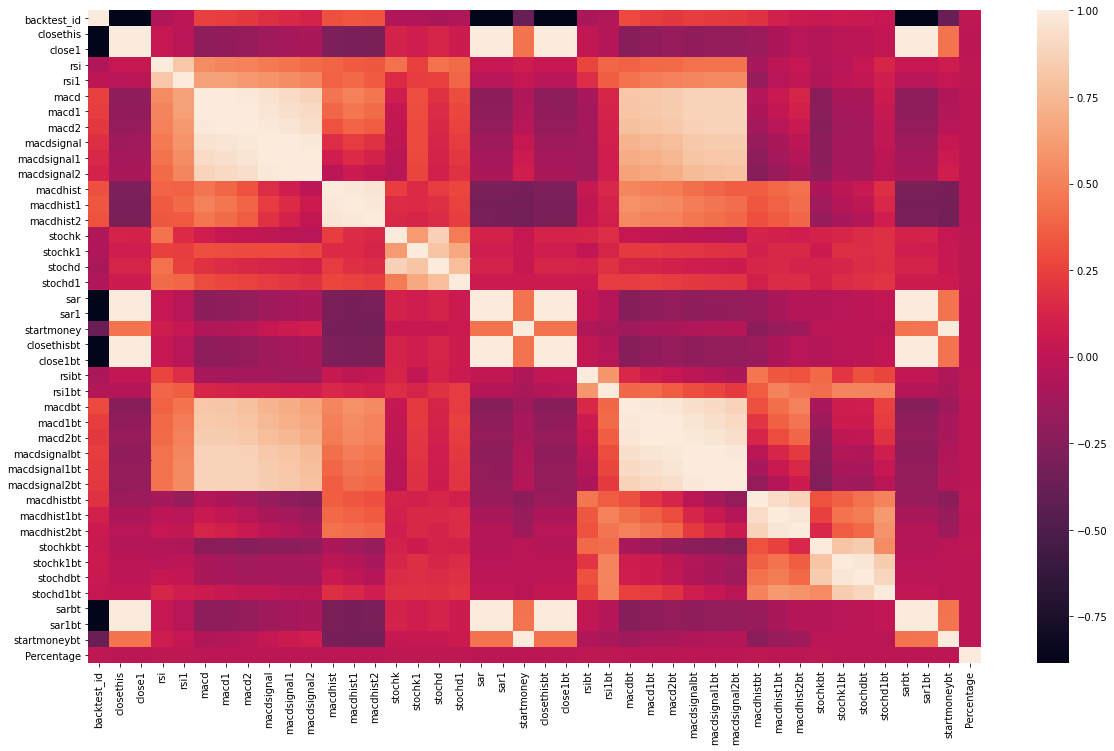

In [26]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(corr_mat)

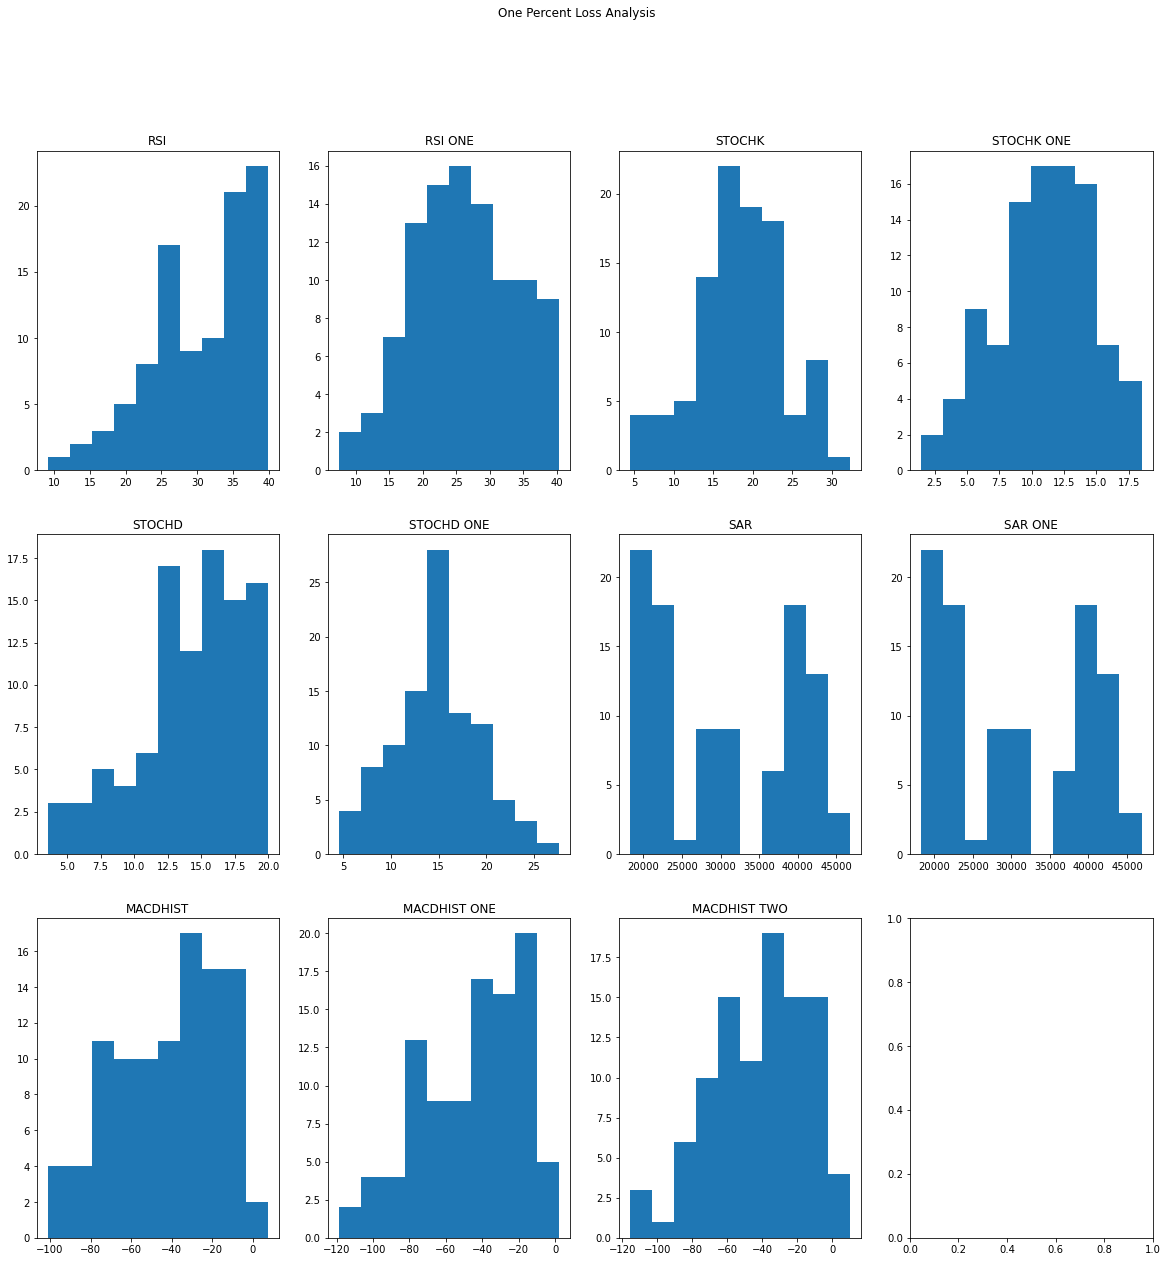

In [27]:
AnalysisPlot(withOnePercLossTrades, 'One Percent Loss Analysis', 'Enter')

In [28]:
print("One percent loss Enter Macd Analysis")
MacdAnalysis(withOnePercLossTrades, "macdhist", "macdhist1","macdhist2" )

One percent loss Enter Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  0
Percentage of Macd < Macd One and Macd One > Macd Two :  0.000
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  23
Percentage of Macd > Macd One > Macd Two :  0.232
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  76
Percentage of Macd > Macd One and Macd One < Macd Two :  0.768
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  0
Percentage of Macd < Macd One < Macd Two :  0.000


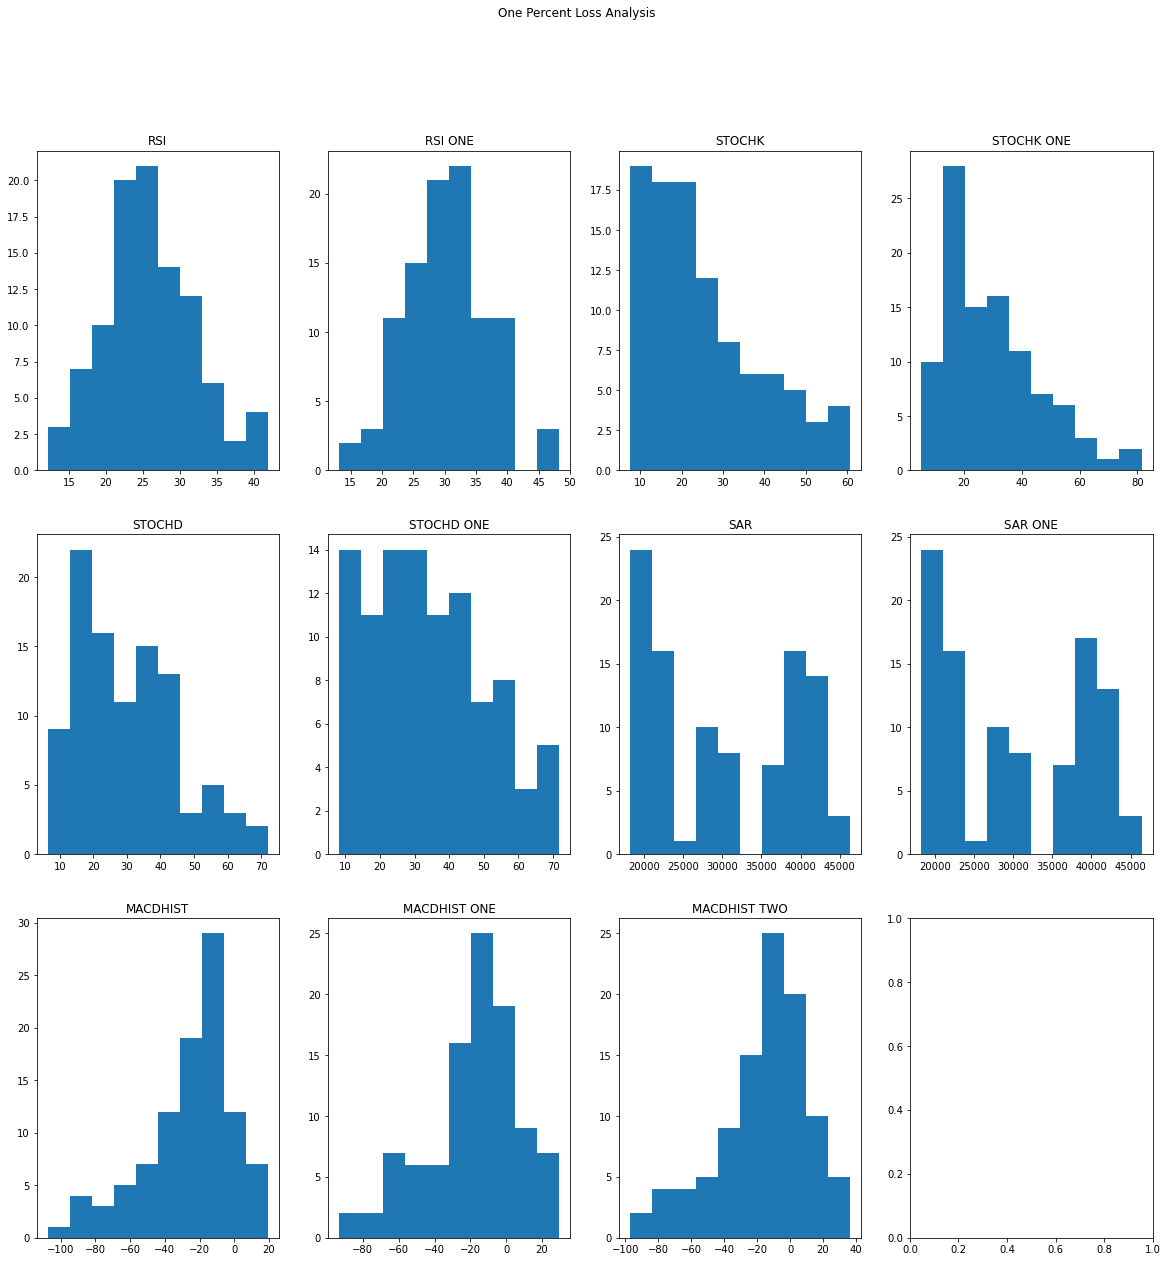

In [29]:
AnalysisPlot(withOnePercLossTrades, 'One Percent Loss Analysis', 'Exit')

In [30]:
print("One percent loss Exit Macd Analysis")
MacdAnalysis(withOnePercLossTrades, "macdhistbt", "macdhist1bt","macdhist2bt" )

One percent loss Exit Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  27
Percentage of Macd < Macd One and Macd One > Macd Two :  0.273
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  12
Percentage of Macd > Macd One > Macd Two :  0.121
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  6
Percentage of Macd > Macd One and Macd One < Macd Two :  0.061
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  54
Percentage of Macd < Macd One < Macd Two :  0.545


In [31]:
import numpy as np 

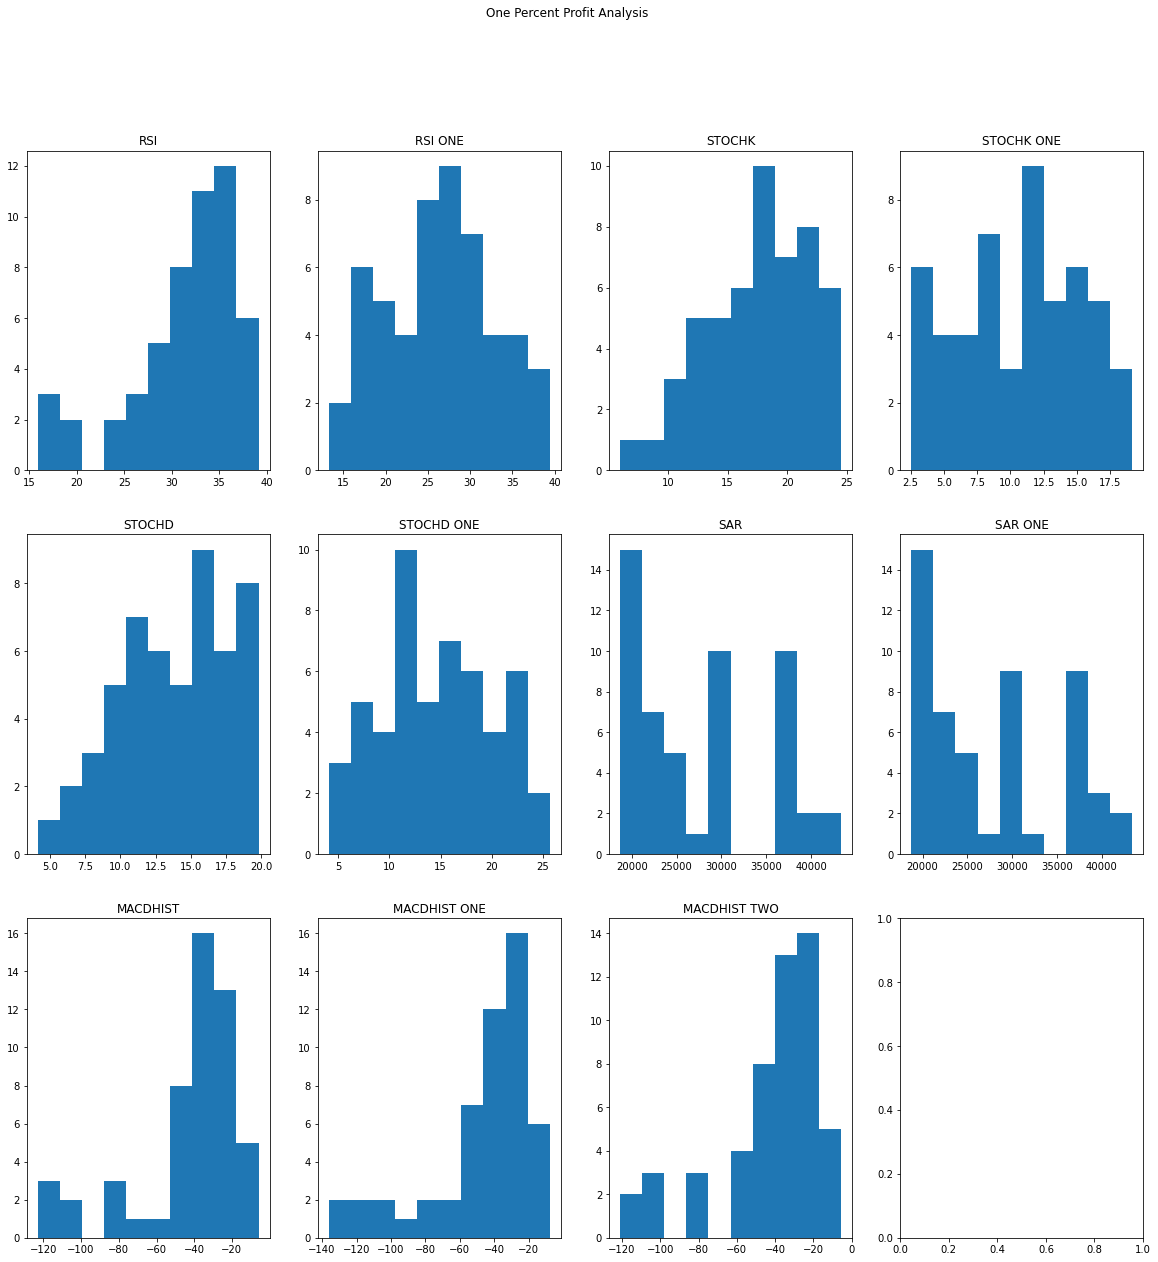

In [32]:
AnalysisPlot(withOnePercProfitTrades,'One Percent Profit Analysis', 'Enter')

In [33]:
print("One percent profit Enter trades Macd Analysis")
MacdAnalysis(withOnePercProfitTrades, "macdhist", "macdhist1","macdhist2" )

One percent profit Enter trades Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  0
Percentage of Macd < Macd One and Macd One > Macd Two :  0.000
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  9
Percentage of Macd > Macd One > Macd Two :  0.173
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  43
Percentage of Macd > Macd One and Macd One < Macd Two :  0.827
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  0
Percentage of Macd < Macd One < Macd Two :  0.000


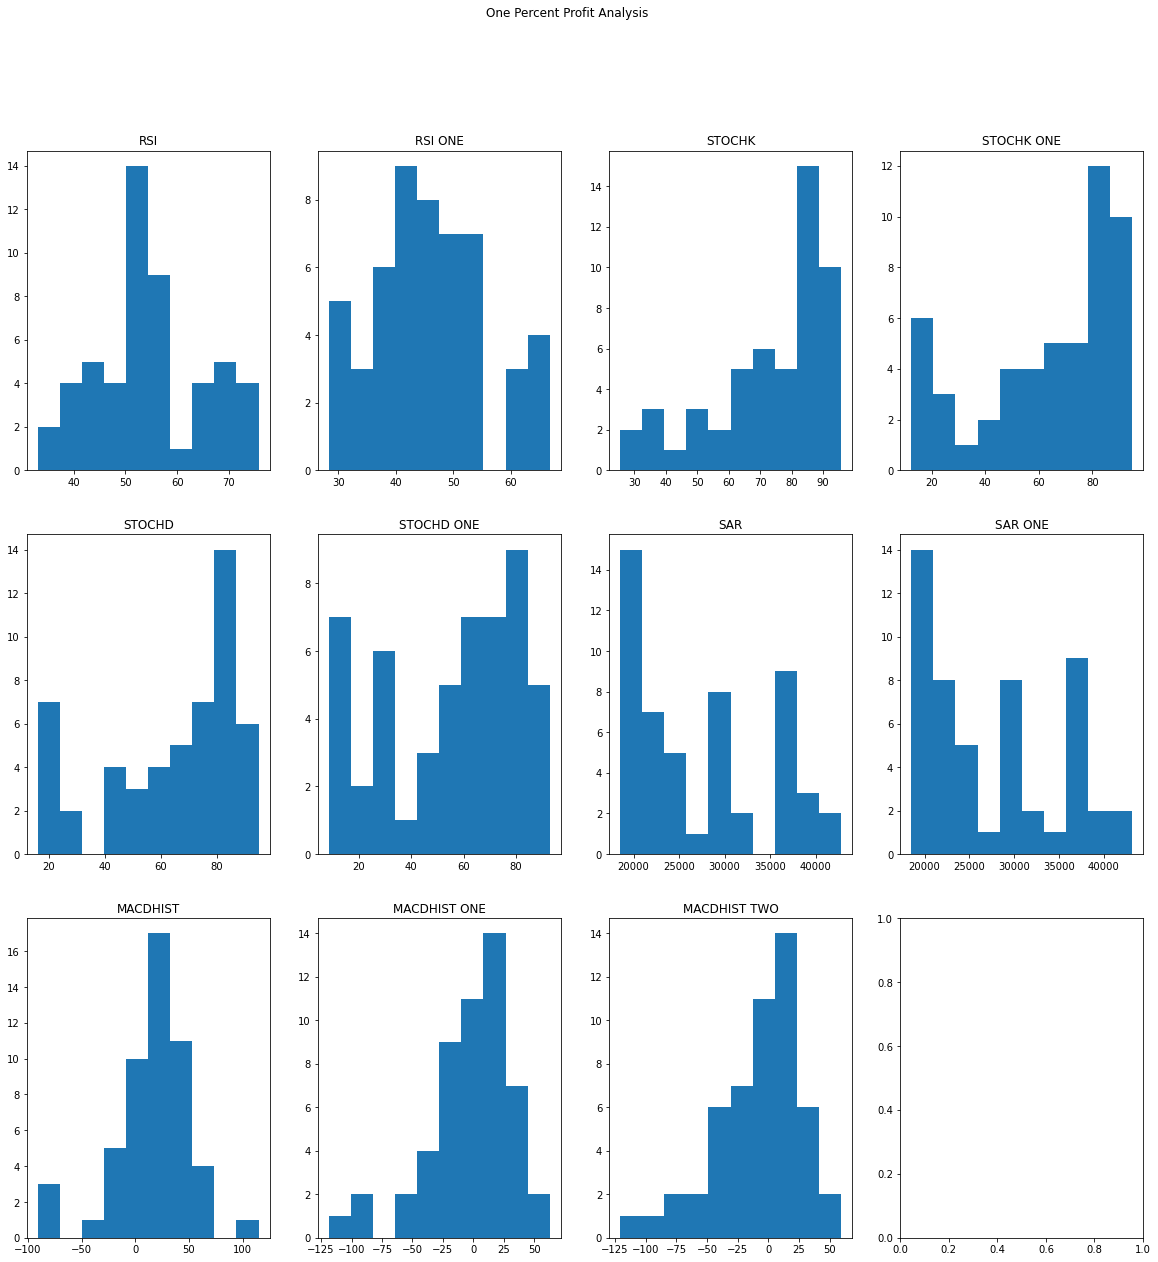

In [34]:
AnalysisPlot(withOnePercProfitTrades,'One Percent Profit Analysis', 'Exit')

In [35]:
print("One percent profit Exit trades Macd Analysis")
MacdAnalysis(withOnePercProfitTrades, "macdhistbt", "macdhist1bt","macdhist2bt" )

One percent profit Exit trades Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  0
Percentage of Macd < Macd One and Macd One > Macd Two :  0.000
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  50
Percentage of Macd > Macd One > Macd Two :  0.962
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  2
Percentage of Macd > Macd One and Macd One < Macd Two :  0.038
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  0
Percentage of Macd < Macd One < Macd Two :  0.000


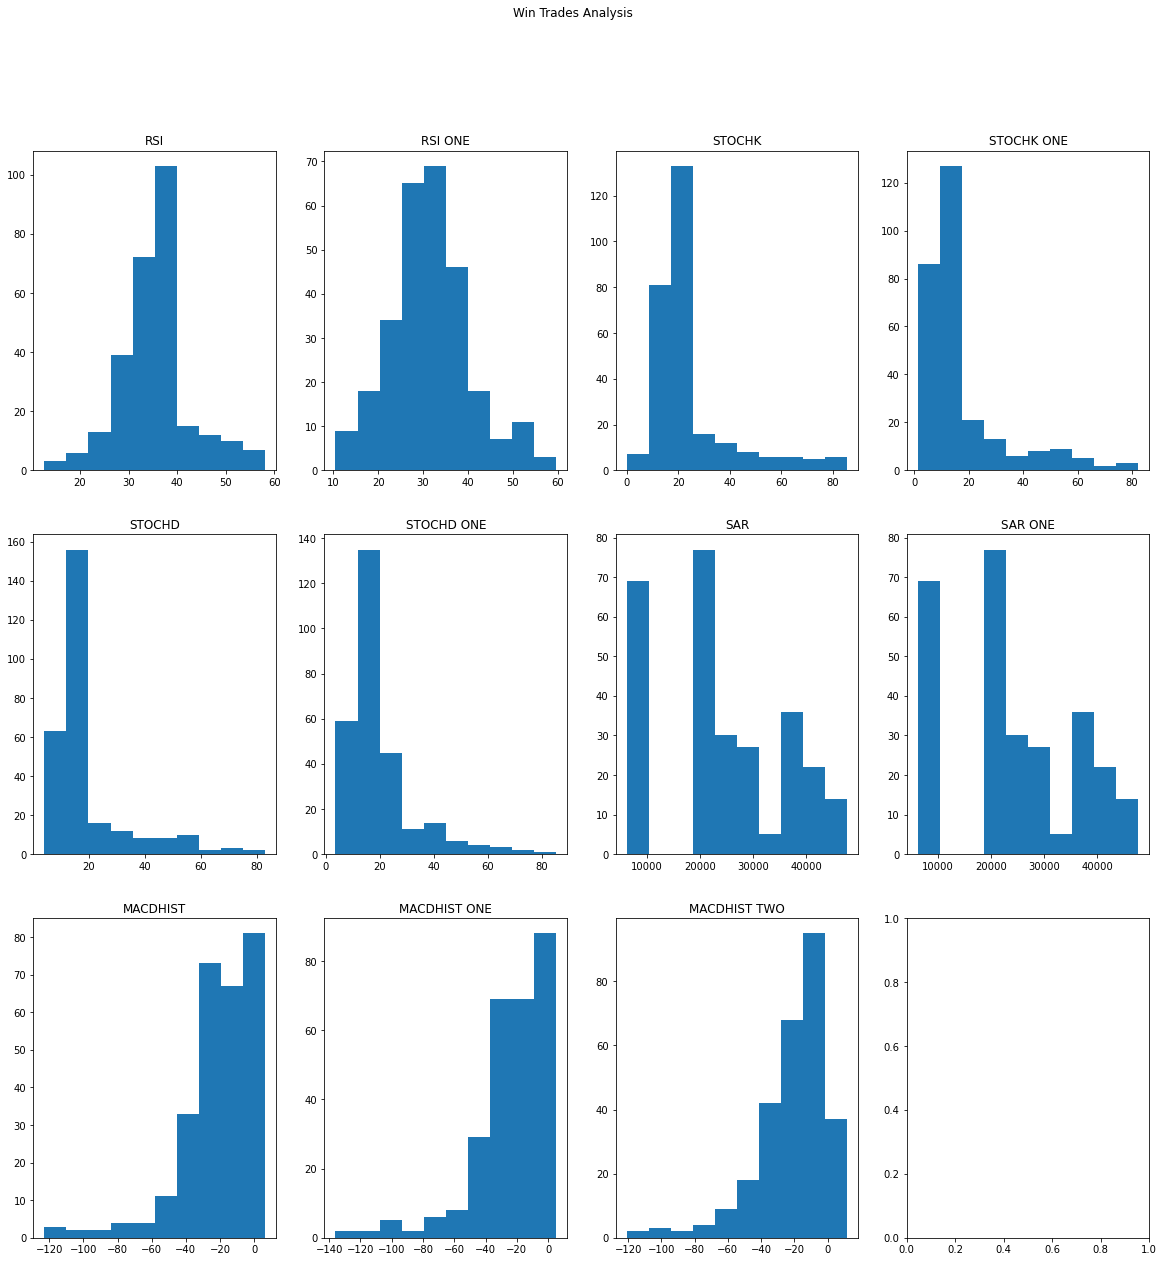

In [36]:
AnalysisPlot(winTrades, 'Win Trades Analysis', 'Enter')

In [37]:
print("Win Trades Enter Macd Analysis")
MacdAnalysis(winTrades, "macdhist", "macdhist1","macdhist2" )

Win Trades Enter Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  8
Percentage of Macd < Macd One and Macd One > Macd Two :  0.029
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  66
Percentage of Macd > Macd One > Macd Two :  0.236
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  187
Percentage of Macd > Macd One and Macd One < Macd Two :  0.668
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  18
Percentage of Macd < Macd One < Macd Two :  0.064


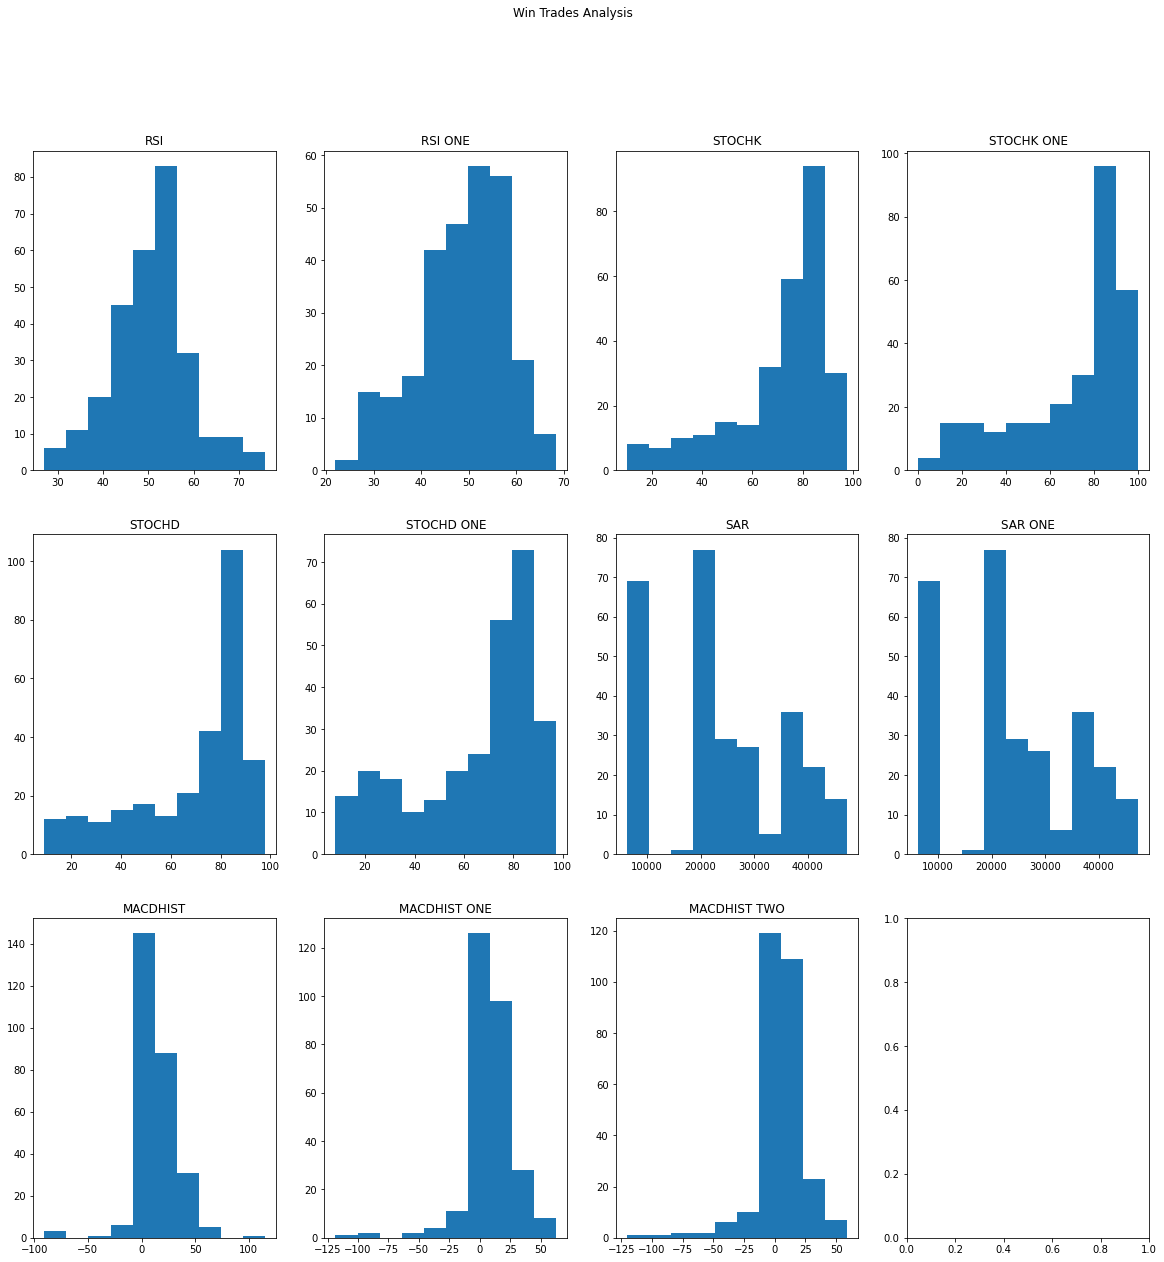

In [38]:
AnalysisPlot(winTrades, 'Win Trades Analysis', 'Exit')

In [39]:
print("Win Trades Exit Macd Analysis")
MacdAnalysis(winTrades, "macdhistbt", "macdhist1bt","macdhist2bt" )

Win Trades Exit Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  57
Percentage of Macd < Macd One and Macd One > Macd Two :  0.204
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  188
Percentage of Macd > Macd One > Macd Two :  0.671
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  22
Percentage of Macd > Macd One and Macd One < Macd Two :  0.079
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  12
Percentage of Macd < Macd One < Macd Two :  0.043


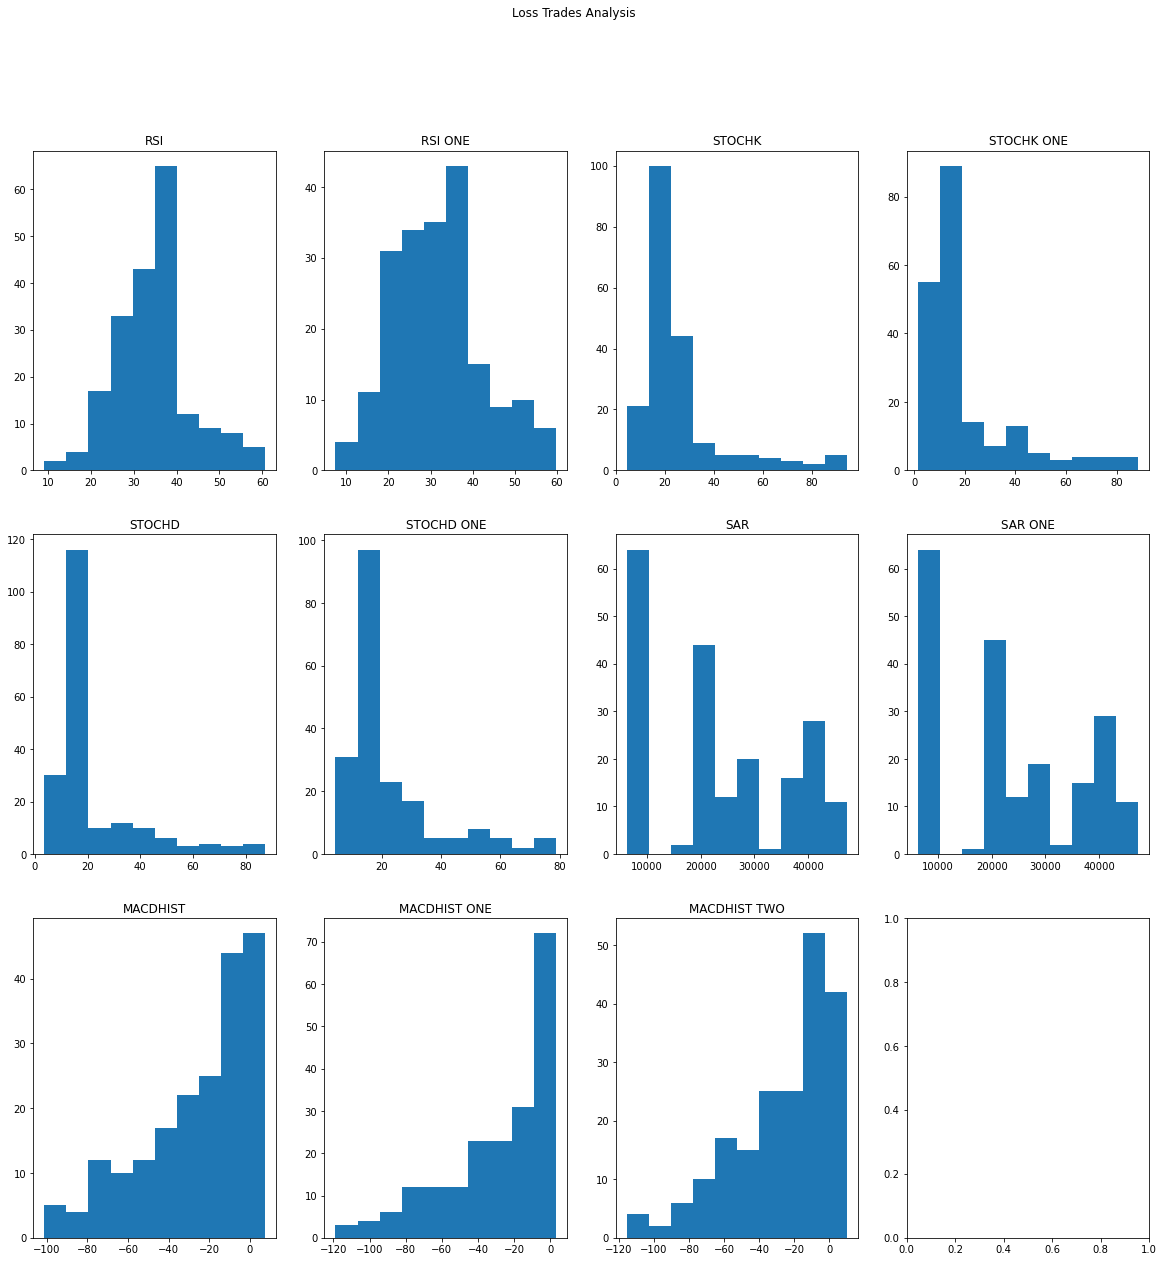

In [40]:
AnalysisPlot(lossTrades, 'Loss Trades Analysis', 'Enter')

In [41]:
print("Loss Trades Enter Macd Analysis")
MacdAnalysis(lossTrades, "macdhist", "macdhist1","macdhist2" )

Loss Trades Enter Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  9
Percentage of Macd < Macd One and Macd One > Macd Two :  0.045
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  53
Percentage of Macd > Macd One > Macd Two :  0.268
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  114
Percentage of Macd > Macd One and Macd One < Macd Two :  0.576
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  21
Percentage of Macd < Macd One < Macd Two :  0.106


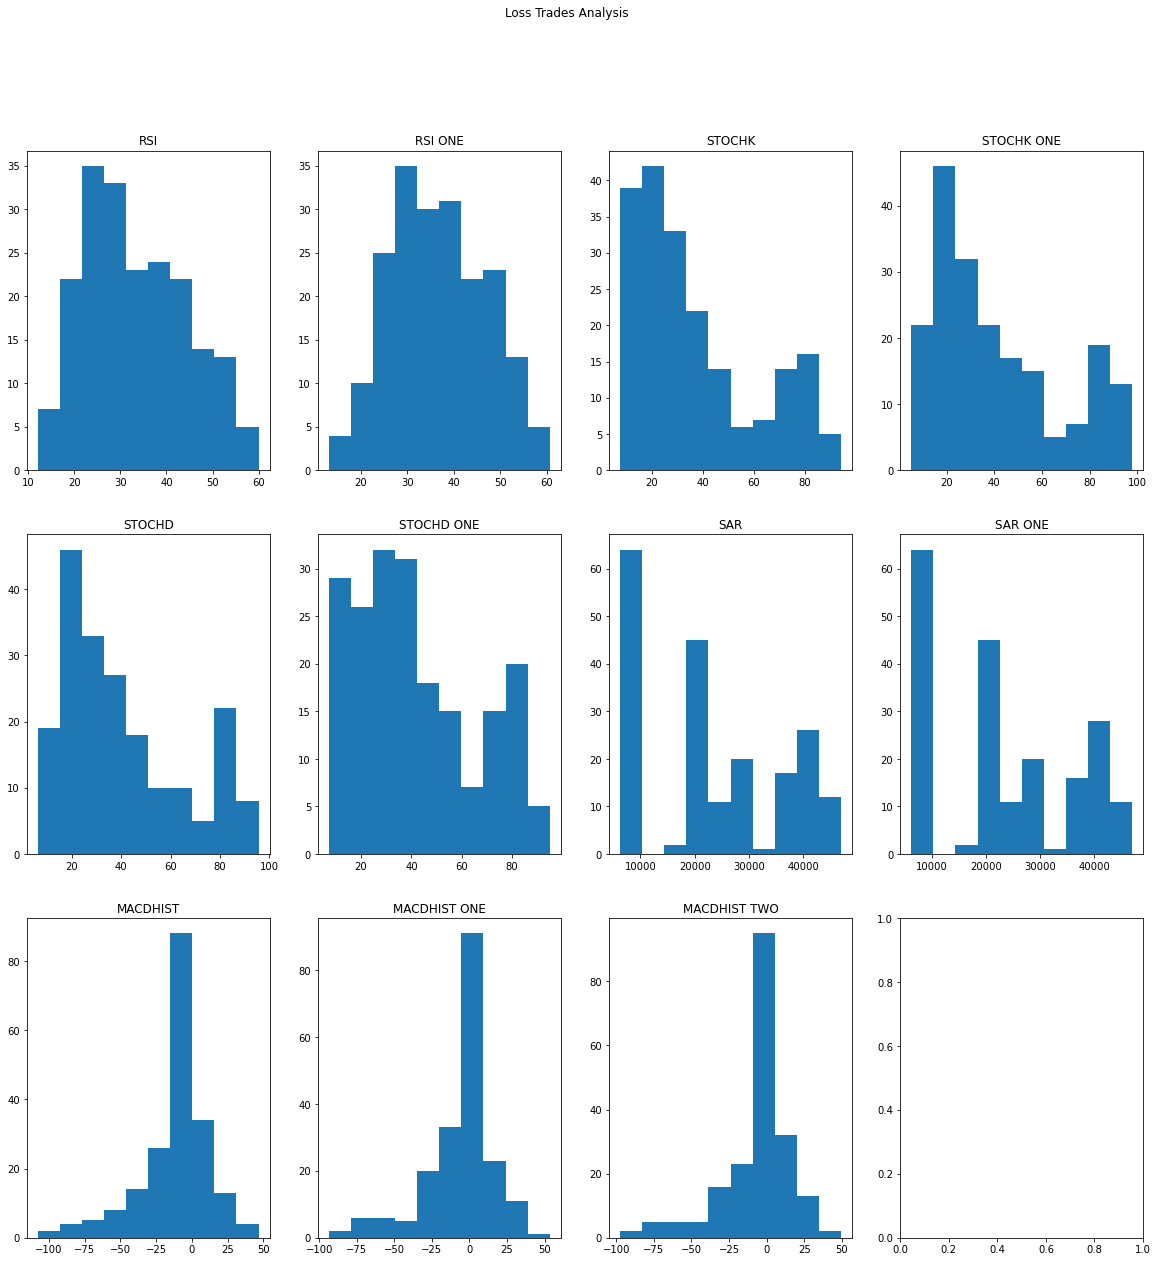

In [42]:
AnalysisPlot(lossTrades, 'Loss Trades Analysis', 'Exit')

In [43]:
print("Loss Trades Exit Macd Analysis")
MacdAnalysis(lossTrades, "macdhistbt", "macdhist1bt","macdhist2bt" )

Loss Trades Exit Macd Analysis
Count of Macd < Macd One and Macd One > Macd Two :  49
Percentage of Macd < Macd One and Macd One > Macd Two :  0.247
----------------------------------------------------------
Count of Macd > Macd One > Macd Two :  48
Percentage of Macd > Macd One > Macd Two :  0.242
----------------------------------------------------------
Count of Macd > Macd One and Macd One < Macd Two :  7
Percentage of Macd > Macd One and Macd One < Macd Two :  0.035
----------------------------------------------------------
Count of Macd < Macd One < Macd Two :  94
Percentage of Macd < Macd One < Macd Two :  0.475
